In [12]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import stats
%matplotlib inline

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 11)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x[:, :10], dim=1), x[:, 10]

In [3]:
device = torch.device("cpu")
model = Net().to(device)
model.load_state_dict(torch.load("./mnist.model", map_location={'cuda:0': 'cpu'}))
model.eval()

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=11, bias=True)
)

### Image in mnist

In [6]:
train_mnist = torch.utils.data.DataLoader(
    datasets.MNIST('../data/mnist', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=10000, shuffle=True)
test_mnist = torch.utils.data.DataLoader(
    datasets.MNIST('../data/mnist', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=10000, shuffle=True)

In [8]:
mnistiter = iter(train_mnist)
mnist_images, mnist_labels = mnistiter.next()

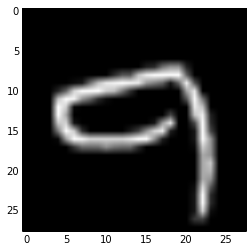

In [9]:
im = mnist_images[3, :, :, :].numpy().reshape(28, 28)
imgplot = plt.imshow(im, cmap='gray')

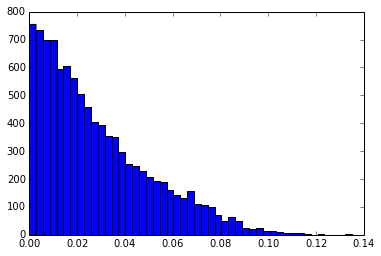

In [10]:
last_d = model(mnist_images)[1].abs().data.numpy()
plt.hist(np.hstack(last_d), bins='auto')
plt.show()

In [13]:
stats.describe(last_d)

(10000,
 (1.4491379e-06, 0.13498884),
 0.028119562,
 0.0005194267,
 1.0112359229112937,
 0.5313207137605822)

In [14]:
np.percentile(last_d, 50)

0.02212093397974968

In [17]:
dataiter = iter(test_mnist)
images, labels = dataiter.next()

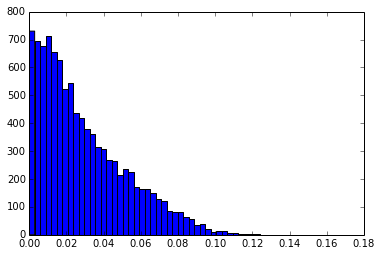

In [18]:
# test image 
last_d = model(images)[1].abs().data.numpy()
plt.hist(np.hstack(last_d), bins='auto')
plt.show()

In [20]:
stats.describe(last_d)

(10000,
 (5.3979456e-06, 0.1625968),
 0.028862186,
 0.000527931,
 0.9619689745711374,
 0.3744861875219736)

In [21]:
np.percentile(last_d, 50)

0.02278870902955532

### Different image - fashion mnist

In [22]:
train_fashion = torch.utils.data.DataLoader(
    datasets.FashionMNIST('../data/fashionMnist', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=10000, shuffle=True)
test_fashion = torch.utils.data.DataLoader(
    datasets.MNIST('../data/fashionMnist', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=10000, shuffle=True)

In [23]:
dataiter = iter(train_fashion)
images, labels = dataiter.next()

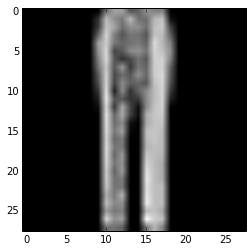

In [24]:
x = images[0, :, :, :]
im = x.numpy().reshape(28, 28)
imgplot = plt.imshow(im, cmap='gray')

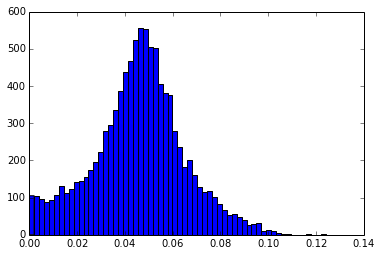

In [25]:
last_d = model(images)[1].abs().data.numpy()
plt.hist(np.hstack(last_d), bins='auto')
plt.show()

In [26]:
stats.describe(last_d)

(10000,
 (2.1707267e-05, 0.12396263),
 0.045757607,
 0.00036829582,
 -0.009555273644659799,
 0.1927398223929262)

In [27]:
np.percentile(last_d, 50)

0.046487441286444664

### EMNIST

In [28]:
# mnist
train_fashion = torch.utils.data.DataLoader(
    datasets.EMNIST('../data/EMnist', split='mnist', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.RandomHorizontalFlip(p=1),
                       transforms.RandomRotation([90, 90]),
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=10000, shuffle=True)
test_fashion = torch.utils.data.DataLoader(
    datasets.EMNIST('../data/EMnist', split='mnist',train=False, transform=transforms.Compose([
                       transforms.RandomHorizontalFlip(p=1),
                       transforms.RandomRotation([90, 90]),
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=10000, shuffle=True)

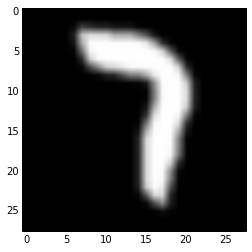

In [34]:
dataiter = iter(train_fashion)
images, labels = dataiter.next()
x = images[0, :, :, :]
im = x.numpy().reshape(28, 28)
imgplot = plt.imshow(im, cmap='gray')

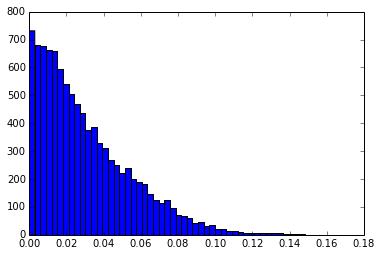

In [35]:
last_d = model(images)[1].abs().data.numpy()
plt.hist(np.hstack(last_d), bins='auto')
plt.show()

In [36]:
stats.describe(last_d)

(10000,
 (1.0523945e-05, 0.16353065),
 0.030324463,
 0.00061659806,
 1.1728595369729213,
 1.372506515307557)

In [37]:
np.percentile(last_d, 50)

0.023973699659109116

In [38]:
# letter
train_fashion = torch.utils.data.DataLoader(
    datasets.EMNIST('../data/EMnist', split='letters', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.RandomHorizontalFlip(p=1),
                       transforms.RandomRotation([90, 90]),
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=10000, shuffle=True)
test_fashion = torch.utils.data.DataLoader(
    datasets.EMNIST('../data/EMnist', split='letters',train=False, transform=transforms.Compose([
                       transforms.RandomHorizontalFlip(p=1),
                       transforms.RandomRotation([90, 90]),
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=10000, shuffle=True)

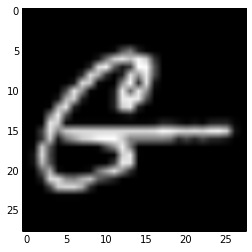

In [39]:
dataiter = iter(train_fashion)
images, labels = dataiter.next()
x = images[0, :, :, :]
im = x.numpy().reshape(28, 28)
imgplot = plt.imshow(im, cmap='gray')

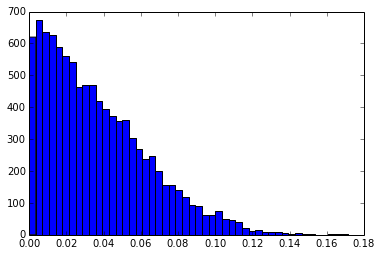

In [41]:
last_d = model(images)[1].abs().data.numpy()
plt.hist(np.hstack(last_d), bins='auto')
plt.show()

In [42]:
from scipy import stats
stats.describe(last_d)

(10000,
 (1.06580555e-05, 0.17154369),
 0.036418047,
 0.0007652635,
 0.9371766456502183,
 0.5717914020654313)

In [43]:
np.percentile(last_d, 50)

0.030828794464468956

### random generated image    

In [31]:
torchvision.datasets.FashionMNIST

In [35]:
model.parameters()

TypeError: 'generator' object has no attribute '__getitem__'

In [24]:
output[:, 9]

tensor([-2.2167, -2.1084, -2.2781, -2.2245, -2.3113, -2.2492, -1.9697,
        -2.1920, -2.3820, -2.2766, -2.3404, -2.4789, -2.3484, -2.1503,
        -2.1928, -2.2398, -1.9991, -2.2497, -2.3593, -2.0657, -2.2267,
        -2.1396, -2.4242, -2.4096, -2.4898, -2.2539, -2.0895, -2.2522,
        -2.2553, -2.2214, -2.2430, -2.1451])

In [28]:
type(torch.Tensor(len(output) * [0]).to(device))

torch.Tensor